# Numerical Optimization

Zhentao Shi

<!-- code is tested on SCRP -->

## Optimization 

* Econometrics curriculum does not pay enough attention to numerical optimization
* Most estimators solve optimization

* Operational research
* Understand the essence

### User Cases

* Maximum likelihood estimation
* Discrete / mixed data type
* Machine learning / regularization
* Classification

* Big data stochastic algorithm


* Generic optimization problem

$$
\min_{\theta \in \Theta } f(\theta) \,\, \mathrm{ s.t. }  g(\theta) = 0, h(\theta) \leq 0,
$$

* $f(\cdot)\in \mathbb{R}$: criterion function
* $g(\theta) = 0$: a vector of equality constraints
* $h(\theta)\leq 0$: a vector of inequality constraints.


* unconstrained
* constrained
* Lagrangian 

### Convenience vs. Efficiency

* Convenience: readability of the mathematical expressions and the code
* Efficiency:  computing speed

* Put convenience as priority at the trial-and-error stage, 
* Improve efficiency when necessary at a later stage for full-scale execution.

## Methods

* Many optimization algorithms
* Variants of a few fundamental principles.


## Newton's Method

* Essential idea for optimizing a twice-differentiable objective function
* Necessary condition: the first-order condition

$$
s(\theta) = \partial f(\theta) / \partial \theta = 0
$$

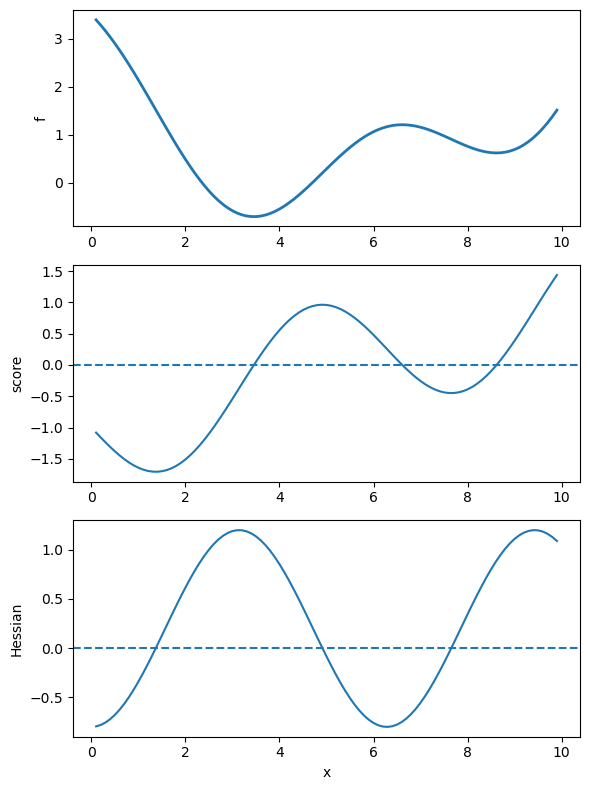

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define functions
def f(x):
    return 0.1 * (x - 5) ** 2 + np.cos(x)

def s(x):
    return 0.2 * (x - 5) - np.sin(x)

def h(x):
    return 0.2 - np.cos(x)

# create x array
x_base = np.arange(0.1, 10, 0.1)

# create plots
fig, axs = plt.subplots(3, 1, figsize=(6, 8))

axs[0].plot(x_base, f(x_base), linewidth=2)
axs[0].set_ylabel('f')

axs[1].plot(x_base, s(x_base))
axs[1].axhline(y=0, linestyle='--')
axs[1].set_ylabel('score')

axs[2].plot(x_base, h(x_base))
axs[2].axhline(y=0, linestyle='--')
axs[2].set_ylabel('Hessian')
axs[2].set_xlabel('x')

plt.tight_layout()
plt.show()

### Iteartion

* Initial trial value $\theta_0$, 
* If $s(\theta_0) \neq 0$, updated by

$$
\theta_{t+1} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$

for the index of iteration $t=0,1,\cdots$
* $H(\theta) = \frac{ \partial s(\theta )}{ \partial \theta}$ is the Hessian. 


### Mechanism

* Taylor expansion
at $\theta_t$ round  $\theta_{\star}$, a root of $s(\cdot)$. Because $\theta_{ \star }$  is a root,

$$
0 = s(\theta_{\star}) = s(\theta_t) + H(\theta_t) (\theta_{\star} - \theta_t) + O( (\theta_{\star} - \theta_t)^2 ).
$$



### Update

* Ignore the high-order term and rearrange,

$$
\theta_{\star} = \theta_{t} -  \left( H(\theta_t)  \right)^{-1}  s(\theta_t)
$$ 

* iteration formula by replacing $\theta_{\star}$ with the updated $\theta_{t+1}$. 
* Iterate until $|\theta_{t+1} -\theta_{t}| < \epsilon$ (absolute criterion) and/or
$|\theta_{t+1} -\theta_{t}|/|\theta_{t}| < \epsilon$ (relative criterion), 
* $\epsilon$ is a small positive number chosen as a tolerance level.


In [2]:
def Newton(x):
    return x - s(x) / h(x)

In [7]:
x_init = 6 # can experiment with various initial values

gap = 1
epsilon = 0.001  # tolerance
while gap > epsilon:
    x_new = Newton(x_init)
    print(x_new)
    gap = abs(x_init - x_new)
    x_init = x_new

6.6306685575825846
6.611216774253945
6.611301507665787


## Features of Newton's Method


* It seeks the solution to $s(\theta) = 0$. 
* The first-order condition is necessary but not sufficient
* Verify the second-order condition
* Compare the value of multiple minima for global minimum

* It requires gradient $s(\theta)$ and the Hessian $H(\theta)$.
* It numerically converges at quadratic rate.

## Quasi-Newton Method

* Most well-known quasi-Newton algorithm is [BFGS](http://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* It avoids explicit calculation of Hessian
* It starts from an initial (inverse) Hessian
* Updates Hessian by an explicit formula via quadratic approximation

## Derivative-Free Method

* [Nelder-Mead](http://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method)
* Simplex method
* Search a local minimum 
  * reflection
  * expansion
  * contraction



## Package

* [R Optimization Task View](http://cran.r-project.org/web/views/Optimization.html) 
* Package [`optimx`](http://cran.r-project.org/web/packages/optimx/index.html) ([Nash, 2014](https://www.jstatsoft.org/article/view/v060i02))
  * Unified interface for various widely-used algorithms. 
  * Facilitates comparison among optimization algorithms
  

### Example

* Use `optimx` to solve pseudo Poisson maximum likelihood estimation (PPML)
* Popular estimator for cross-country bilateral trade
* Conditional mean model

$$
E[y_i | x_i] = \exp( x_i' \beta),
$$

### Poisson MLE

If $Z \sim Poisson(\lambda)$, then 

$$
\Pr(Z = k) = \frac{\mathrm{e}^{-\lambda} \lambda^k}{k!}, \mathrm{ for }\, \, k=0,1,2,\ldots,
$$

and the log-likelihood

$$
\log \Pr(Y = y | x) =  -\exp(x'\beta) + y\cdot x'\beta - \log k!
$$

* Log-likelihood function of the sample

$$
\ell(\beta) = \log \Pr( \mathbf{y} | \mathbf{x};\beta ) =
-\sum_{i=1}^n \exp(x_i'\beta) + \sum_{i=1}^n y_i x_i'\beta.
$$

* gradient

$$
s(\beta) =\frac{\partial \ell(\beta)}{\partial \beta} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i + \sum_{i=1}^n y_i x_i.
$$

* Hessian

$$
H(\beta) = \frac{\partial^2 \ell(\beta)}{\partial \beta \partial \beta'} =
-\sum_{i=1}^n \exp(x_i'\beta)x_i x_i'
$$

is negative definite.

* $\ell(\beta)$ is strictly concave in $\beta$.

* Default optimization is minimization
* Use *negative* log-likelihood


In [8]:
def poisson_loglik(b):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    return ell


* Write the criterion as a function of the parameter to be optimized 
* Data can be fed inside or outside of the function.
  * If the data is provided as additional arguments, these arguments must be explicit.


In [9]:
from scipy.optimize import minimize
import statsmodels.api as sm
import numpy as np

## prepare the data
data = sm.datasets.get_rdataset('RecreationDemand', 'AER').data
y = data['trips']
X = data[['income']]
X = sm.add_constant(X)

## estimation
b_init = [0, 1]  # initial value
b_hat_bfgs = minimize(poisson_loglik, b_init, method='BFGS', options={'gtol': 1e-7, 'disp': True})
b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})

print(f"BFGS: {b_hat_bfgs}")
print(f"Nelder-Mead: {b_hat_nm}")


         Current function value: 261.114078
         Iterations: 22
         Function evaluations: 105
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 261.114078
         Iterations: 83
         Function evaluations: 150
BFGS:   message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 261.11407829533016
        x: [ 1.177e+00 -9.994e-02]
      nit: 22
      jac: [-3.433e-05 -4.578e-05]
 hess_inv: [[ 6.451e-04 -6.332e-04]
            [-6.332e-04  6.236e-04]]
     nfev: 105
     njev: 35
Nelder-Mead:        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 261.11407845438714
             x: [ 1.177e+00 -9.993e-02]
           nit: 83
          nfev: 150
 final_simplex: (array([[ 1.177e+00, -9.993e-02],
                       [ 1.177e+00, -9.995e-02],
                       [ 1.177e+00, -9.995e-02]]), array([ 2.611e+02,  2.611e+

C:\Users\zhent\AppData\Local\Temp\ipykernel_23468\568367284.py:14: OptimizeWarning: Unknown solver options: xtol
  b_hat_nm = minimize(poisson_loglik, b_init, method='Nelder-Mead', options={'xtol': 1e-7, 'disp': True})


### Alternative Formulation

* Nonlinear least squares (NLS) is also valid in theory.
* NLS minimizes

$$
\sum_{i=1}^n (y_i - \exp(x_i \beta))^2
$$

* Why PPML is preferred? 

* PPML's optimization for the linear index is globally convex.
* Numerical optimization of PPML is easier and more robust

### Caveats

* No algorithm suits all problems. 
* Simulation is helpful to check the accuracy of optimization
* Contour plot helps visualize the function surface/manifold

### Example

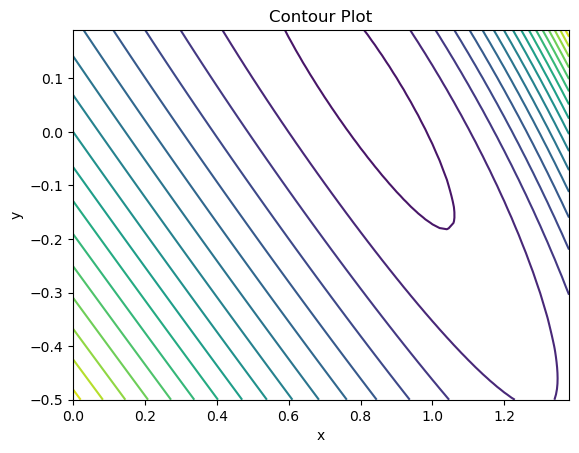

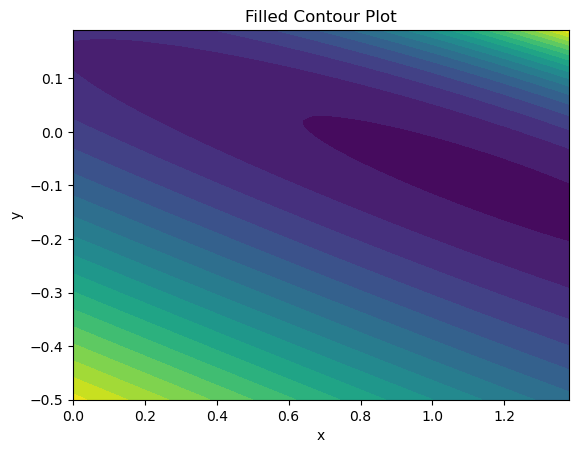

In [10]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import statsmodels.api as sm


## generate contour plot
x_grid = np.arange(0, 1.4, 0.02)
x_length = len(x_grid)
y_grid = np.arange(-0.5, 0.2, 0.01)
y_length = len(y_grid)

z_contour = np.zeros((x_length, y_length))

for i in range(x_length):
    for j in range(y_length):
        z_contour[i, j] = poisson_loglik([x_grid[i], y_grid[j]])

## generate filled contour plot
plt.contourf(x_grid, y_grid, z_contour.T, 20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Filled Contour Plot')
plt.show()


### NLOPT

* Third-party standalone solvers 
* [`NLopt`](http://ab-initio.mit.edu/wiki/index.php/NLopt_Installation)
* [extensive list of algorithms](http://ab-initio.mit.edu/wiki/index.php/NLopt_Algorithms#SLSQP)
* Package [`nloptr`](http://cran.r-project.org/web/packages/nloptr/index.html)


### Example

We first carry out the Nelder-Mead algorithm in NLOPT.


In [12]:
## optimization with Nelder-Mead algorithm
from nlopt import nlopt
import numpy as np

def poisson_loglik_2(params, grad):
    b = np.ravel(params)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    return ell

opts = {
    'algorithm': nlopt.LN_NELDERMEAD,
    'xtol_rel': 1e-7,
    'maxeval': 500
}

res_NM = nlopt.opt(opts['algorithm'], 2)
res_NM.set_lower_bounds([-np.inf, 0])
res_NM.set_min_objective(poisson_loglik_2)
res_NM.set_xtol_rel(opts['xtol_rel'])
x0 = b_init
res_NM.optimize(x0)
print("Optimal value of objective function:", res_NM.last_optimum_value())
print("NLopt solver status:", res_NM.last_optimize_result())
print("Number of Iterations....:", res_NM.get_numevals())

## optimization with SLSQP algorithm (equivalent to BFGS)
opts = {
    'algorithm': nlopt.LD_SLSQP,
    'xtol_rel': 1e-7
}

res_SLSQP = nlopt.opt(opts['algorithm'], 2)
res_SLSQP.set_lower_bounds([-np.inf, 0])
res_SLSQP.set_min_objective(poisson_loglik_2)
res_SLSQP.set_xtol_rel(opts['xtol_rel'])
x0 = b_init
res_SLSQP.optimize(x0)


Optimal value of objective function: 283.37946417993635
NLopt solver status: 4
Number of Iterations....: 69


array([0., 1.])

To invoke BFGS in NLOPT, we must code up the gradient $s(\beta)$,
as in the function `poisson.log.grad()`.

In [13]:
def poisson_loglik_grad(b):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * lambda_)
    grad = -(X.T @ (y - lambda_))
    return grad


* Compare the analytical gradient with the numerical gradient
* Ensure the code is correct.

In [15]:
import numdifftools as nd
import numpy as np

b = np.array([0, 0.5])

# check the numerical gradient
num_grad = nd.Gradient(poisson_loglik)(b)
print(f"Numerical gradient: {num_grad}")

# check the analytical gradient
ana_grad = poisson_loglik_grad(b)
print(f"Analytical gradient: {ana_grad}")


Numerical gradient: [ 6542.45964498 45825.400521  ]
Analytical gradient: const      6542.459645
income    45825.400521
dtype: float64


In [16]:
def poisson_loglik_grad_2(b, grad):
    b = np.ravel(b)
    lambda_ = np.exp(X @ b)
    ell = -np.sum(-lambda_ + y * np.log(lambda_))
    if grad.size > 0:
        grad[:] = -(X.T @ (y - lambda_))
    return ell

BFGS with Gradient

In [17]:
opts = {
    'algorithm': nlopt.LD_LBFGS,
    'xtol_rel': 1e-7,
}

# Set up the optimization object
res_BFGS = nlopt.opt(opts['algorithm'], 2)

# Set the lower bounds for the parameters
res_BFGS.set_lower_bounds([-np.inf, 0])

# Set the objective function and tolerance for convergence
res_BFGS.set_min_objective(poisson_loglik_grad_2)
res_BFGS.set_xtol_rel(opts['xtol_rel'])

# Set the initial parameter values and optimize
x0 = np.zeros(2)
res_BFGS.optimize(x0)

# Print the optimization result
print(f"BFGS algorithm with analytical gradient: {res_BFGS.last_optimize_result()}")


BFGS algorithm with analytical gradient: 1


c:\Users\zhent\anaconda3\envs\tf_env\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Convex Optimization

* Local minimum is a global minimum.
* Particularly important in high-dimensional problems
* [Boyd and Vandenberghe (2004)](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)
* "Convex optimization is technology; all other optimizations are arts."

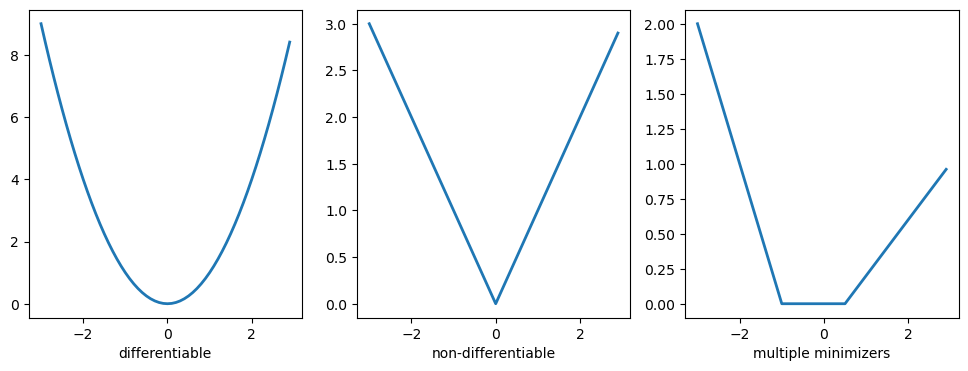

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Define the functions
f1 = lambda x: x ** 2
f2 = lambda x: np.abs(x)
f3 = lambda x: np.where(x <= -1, (-x - 1), np.where(x >= 0.5, 0.4 * x - 0.2, 0))

# Set up the plots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot f1
x_base = np.arange(-3, 3, 0.1)
axs[0].plot(x_base, f1(x_base), lw=2)
axs[0].set_xlabel('differentiable')

# Plot f2
axs[1].plot(x_base, f2(x_base), lw=2)
axs[1].set_xlabel('non-differentiable')

# Plot f3
axs[2].plot(x_base, f3(x_base), lw=2)
axs[2].set_xlabel('multiple minimizers')
plt.show()


### Example

* Linear regression model MLE


* Normal MLE. The (negative) log-likelihood 

$$
\ell (\beta, \sigma) = \log \sigma + \frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - x_i' \beta)^2
$$

is not convex

* Re-parameterize the criterion function by $\gamma = 1/\sigma$ and $\alpha = \beta / \sigma$, then

$$
\ell (\alpha, \gamma) = -\log \gamma + \frac{1}{2}
\sum_{i=1}^n (\gamma y_i - x_i' \alpha)^2
$$

is convex in $\alpha, \gamma$

* Many MLE estimators in econometric textbooks are convex. 

* [Gao and Shi (2021)](https://link.springer.com/article/10.1007/s10614-020-09995-z) explore the infrastructure in R for convex optimization with two econometric examples. 

* `CVXR` [(Fu, 2018)](https://arxiv.org/abs/1711.07582) is a convenient convex modeling language 
  * Proprietary solvers `CLEPX`, `MOSEK`, and `Gurubi`
  * Open-source solvers `ECOS` and `SDPT3`. 

* `MOSEK` offers free academic license
* [`Rmosek`](http://rmosek.r-forge.r-project.org/)

### Example: Relaxed empirical likelihood

Consider a model with a "true" parameter $\beta_0$ satisfying the moment condition $\mathrm{E}\left[  h\left(Z_i, \beta_0 \right)\right] = 0_m$, where $\left\{Z_i \right\}_{i=1}^n$ is the observed data, $\beta$
is a low dimensional parameter of interest, and  $h$ is an $\mathbb{R}^{m}$-valued moment function. 
Empirical likelihood (EL) [[Owen, 1988]](https://www.jstor.org/stable/2336172) [[Qin, 1994]](https://scholar.google.com/scholar_url?url=https://projecteuclid.org/journals/annals-of-statistics/volume-22/issue-1/Empirical-Likelihood-and-General-Estimating-Equations/10.1214/aos/1176325370.pdf&hl=zh-CN&sa=X&ei=jjrrY-iRBueR6rQP_p6hkAQ&scisig=AAGBfm1LBkrfAAtQfwCPvp4R62ge0YKx4A&oi=scholarr) solves

$$
\max_{\beta \in \mathcal{B}, \pi \Delta_n} \; \sum_{i=1}^n \log \pi_i \;\,\, \text{s.t.} \; \sum_{i=1}^n \pi_i h \left( Z_i, \beta \right) = 0_m
$$

where $\Delta_{n} = \left\{ \pi\in\left[0,1\right]^{n}:\sum_{i=1}^{n}\pi_{i}=1 \right\}$ is the $n$-dimensional probability simplex.



To handle the high-dimensional case, i.e., $m > n$, [[Shi, 2016]](https://www.sciencedirect.com/science/article/abs/pii/S0304407616301373) proposes the relaxed empirical likelihood (REL),  defined as the solution to 

$$
\max_{\beta\in\mathcal{B}}\max_{\pi\in\Delta_{n}^{\lambda}\left(\beta\right)}\,\sum_{i=1}^{n}\log\pi_{i}
$$

where 

$$
\Delta_{n}^{\lambda}\left(\beta\right)=\left\{ \pi_i \in\Delta_{n}:\big|\sum_{i=1}^{n}\pi_{i}h_{ij}\left(\beta\right)\big|\leq\lambda,\:j=1,2,\cdots,m\right\}
$$

is a relaxed simplex, $\lambda\geq0$ is a tuning parameter, $h_{ij}\left(\beta\right)=h_{j}\left(Z_{i},\beta\right)$
is the $j$-th component of $h\left(Z_{i},\beta\right)$.

Similar to standard EL, REL's optimization involves an inner loop
and an outer loop. The outer loop for $\beta$ is a general low-dimensional
nonlinear optimization, which can be solved by Newton-type methods.
With the linear constraints and the logarithm objective, the inner
loop is convex in $\pi=\left(\pi_{i}\right)_{i=1}^{n}$. 
By introducing auxiliary variable, $t_i$, the logarithm objective can be formulated as a linear objective function $\sum_{i=1}^n t_i$ and $n$ exponential conic constraints, $\left(\pi_{i}, 1, t_{i}\right) \in \mathcal{K}_{\mathrm{exp}}=\left\{\left(x_{1}, x_{2}, x_{3}\right): x_{1} \geq x_{2} \exp \left(x_{3} / x_{2}\right), x_{2}>0\right\} \cup\left\{\left(x_{1}, 0, x_{3}\right): x_{1} \geq 0, x_{3} \leq 0\right\}$, $i=1,2,\cdots,n$. 




For each $\beta$, the inner problem can be then formulated as a conic programming problem,

$$
\begin{aligned}
&\max _{\pi, t} \sum_{i=1}^{n} t_{i}\\
\text { s.t. }&\left[\begin{array}{c}
1 \\
-\lambda \\
\vdots \\
-\lambda
\end{array}\right] \leq\left[\begin{array}{cccc}
1 & 1 & \cdots & 1 \\
h_{11}(\beta) & h_{21}(\beta) & \cdots & h_{n 1}(\beta) \\
\vdots & \vdots & \ddots & \vdots \\
h_{1 m}(\beta) & h_{2 m}(\beta) & \cdots & h_{n m}(\beta)
\end{array}\right]\left[\begin{array}{c}
\pi_{1} \\
\pi_{2} \\
\vdots \\
\pi_{n}
\end{array}\right] \leq\left[\begin{array}{c}
1 \\
\lambda \\
\vdots \\
\lambda
\end{array}\right]\\
&\left(\pi_{i}, 1, t_{i}\right) \in \mathcal{K}_{\mathrm{exp}}, 0 \leq \pi_{i} \leq 1, \text { for each } i=1,2, \cdots, n
\end{aligned}
$$

To understand the exponential cone, notice that 
$\left(\pi_{i}, 1, t_{i}\right) \in \mathcal{K}_{\mathrm{exp}}$ is equivalent to
$\{ \pi_i \geq \exp(t_i): \pi_i\geq 0, t_i \leq 0 \}$. It implies 
$t_i \leq \log \pi_i$. Since the problem maximizes $\sum t_i$, we must have 
$t_i = \log \pi_i$. 
The constrained optimization is readily solvable in `Rmosek` by translating the mathematical expression into computer code.


In [19]:
import numpy as np
import cvxpy as cp
from scipy.sparse import csc_matrix, hstack, vstack

def innerloop(b, y, X, Z, tau):
    n, p = X.shape
    m, k = Z.shape

    # Generate moment condition
    H = MomentMatrix(y, X, Z, b)

    # Initialize the CVXPY problem
    beta = cp.Variable(p)
    u = cp.Variable(n)
    v = cp.Variable(n)
    obj = cp.Maximize(cp.sum(u) - tau * cp.sum(v))
    constr = [H @ beta + Z @ u - v == np.ones(m),
              u >= 0,
              v >= 0,
              beta >= 0]
    prob = cp.Problem(obj, constr)

    # Solve the problem
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == 'optimal':
        # Return the optimal value
        return -prob.value
    else:
        # Return infinity if the problem is infeasible
        print('WARNING: Inner loop not optimized')
        return np.inf



(CVXPY) Aug 17 09:25:30 PM: Encountered unexpected exception importing solver OSQP:
ImportError('DLL load failed while importing qdldl: The specified module could not be found.')


The inner loop optimization can also be carried out by `CVXR`.
This code snippet is shorter than easier to read.

In [20]:
import numpy as np
import cvxpy as cp
from cvxpy import log, Maximize, Problem, Variable

def innerloop_cvxr(b, y=None, X=None, Z=None, tau=None):
    n, p = X.shape
    m, k = Z.shape

    # Generate moment condition
    H = MomentMatrix(y, X, Z, b)

    # Initialize the CVXPY problem
    p = cp.Variable(n)
    obj = cp.Maximize(cp.sum(log(p)))
    constr = [cp.sum(p) == 1,
              p >= 0,
              p <= 1,
              H @ p >= -tau,
              H @ p <= tau]
    prob = cp.Problem(obj, constr)

    # Solve the problem
    prob.solve(solver=cp.MOSEK, verbose=False)

    if prob.status == 'optimal':
        # Return the optimal value
        return -prob.value
    else:
        # Return infinity if the problem is infeasible
        print('WARNING: Inner loop not optimized')
        return np.inf
